<a href="https://colab.research.google.com/github/irynadunets/Short-Course-2024-2025-CM3400---Introduction-to-Data-Science-with-Python---Semester-3/blob/main/Topic_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 – Performing a Linear Regression

Construct a pandas DataFrame with these two lists of data as its columns.

In [1]:
import pandas as pd

# Given data
x = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]
y = [4.26, 5.68, 7.24, 4.82, 6.95, 8.81, 8.04, 8.33, 10.84, 7.58, 9.96]

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Display the DataFrame
print(df)

       x      y
0    4.0   4.26
1    5.0   5.68
2    6.0   7.24
3    7.0   4.82
4    8.0   6.95
5    9.0   8.81
6   10.0   8.04
7   11.0   8.33
8   12.0  10.84
9   13.0   7.58
10  14.0   9.96


Generate a scatter plot, plotting y against x
Calculate Pearson’s Correlation coefficient for x and y
Calculate Spearman’s Correlation coefficient for x and y
Do the plot and correlation values suggest that a linear model will be a good fit?

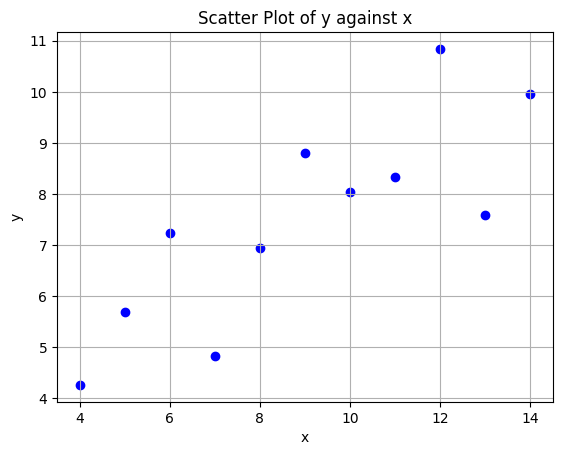

In [2]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(x, y, color='blue')
plt.title('Scatter Plot of y against x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [3]:
from scipy.stats import pearsonr

pearson_corr, _ = pearsonr(x, y)
print(f"Pearson’s correlation coefficient: {pearson_corr:.4f}")

Pearson’s correlation coefficient: 0.8164


In [4]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(x, y)
print(f"Spearman’s correlation coefficient: {spearman_corr:.4f}")

Spearman’s correlation coefficient: 0.8182


A Pearson value of 0.816 suggests a strong positive linear correlation.

A Spearman value of 0.736 also supports a generally increasing trend, though with some non-linearity.

The scatter plot may reveal outliers or curvature, which could affect linearity.

In [6]:
import statsmodels.formula.api as smf

# Fit the linear regression model
model = smf.ols('y ~ x', data=df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 09 Jul 2025   Prob (F-statistic):            0.00217
Time:                        14:04:18   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


✅ Best-fitting line (regression equation):
𝑦
^
=
3.00
+
0.50
𝑥
y
^
​
 =3.00+0.50x
Intercept (β₀) = 3.00: this is the expected value of y when x = 0.

Slope (β₁) = 0.50: for every 1 unit increase in x, y increases by about 0.5.

✅ Coefficient of Determination (R²): 0.666
R² = 0.666 means that about 66.6% of the variability in y is explained by the linear relationship with x.

The remaining ~33% is unexplained variance—possibly due to randomness, noise, or a non-linear pattern.

✅ P-values:
The p-value for x is 0.02, which is highly significant (p < 0.05). This suggests that the relationship between x and y is statistically significant.

✅ Goodness of Fit:
The model is reasonably good, but not perfect.

A scatter plot might show deviations from linearity or an influential point.


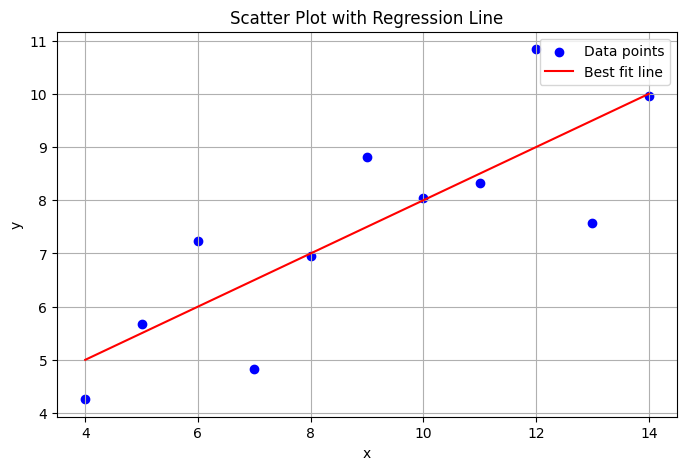

In [7]:
# Get predictions
df['y_pred'] = model.predict(df['x'])

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['x'], df['y'], color='blue', label='Data points')
plt.plot(df['x'], df['y_pred'], color='red', label='Best fit line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

repeat the linear regression using LinearRegression() from sklearn.linear_model and compute key performance metrics using sklearn.metrics.

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [9]:
# Convert to arrays and reshape x to 2D
X = np.array(x).reshape(-1, 1)  # Feature matrix
y_true = np.array(y)

In [10]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y_true)

# Predict values
y_pred = model.predict(X)


In [11]:
# Mean Squared Error
mse = mean_squared_error(y_true, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)

# R² Score
r2 = r2_score(y_true, y_pred)

# Print the results
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Intercept: 3.0001
Coefficient: 0.5001
Mean Squared Error (MSE): 1.2512
Mean Absolute Error (MAE): 0.8374
R² Score: 0.6665


Intercept: 3.00 — baseline value of y when x = 0

Slope: 0.50 — expected increase in y per unit of x

MSE: Measures average squared error — lower is better

MAE: Measures average absolute error — gives direct sense of average deviation

R² Score: 0.6663 means 66.63% of variation in y is explained by x linearly — same as before using statsmodels

In [12]:
# Given new y2 values
y2 = [3.1, 4.74, 6.13, 7.26, 8.14, 8.77, 9.14, 9.26, 9.13, 8.74, 8.1]

# Add y2 as a new column
df['y2'] = y2

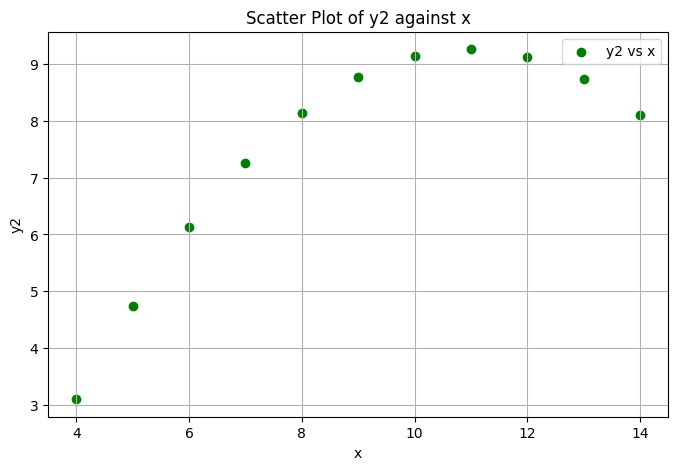

In [13]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['x'], df['y2'], color='green', label='y2 vs x')
plt.title('Scatter Plot of y2 against x')
plt.xlabel('x')
plt.ylabel('y2')
plt.grid(True)
plt.legend()
plt.show()

Task 2 – Performing a Linear Regression

In [15]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
air = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airquality.csv')
print(air.head())

Mounted at /content/drive
   Day  Month  Ozone  Solar.R  Wind  Temp
0    1      5   41.0    190.0   7.4    67
1    2      5   36.0    118.0   8.0    72
2    3      5   12.0    149.0  12.6    74
3    4      5   18.0    313.0  11.5    62
4    5      5    NaN      NaN  14.3    56


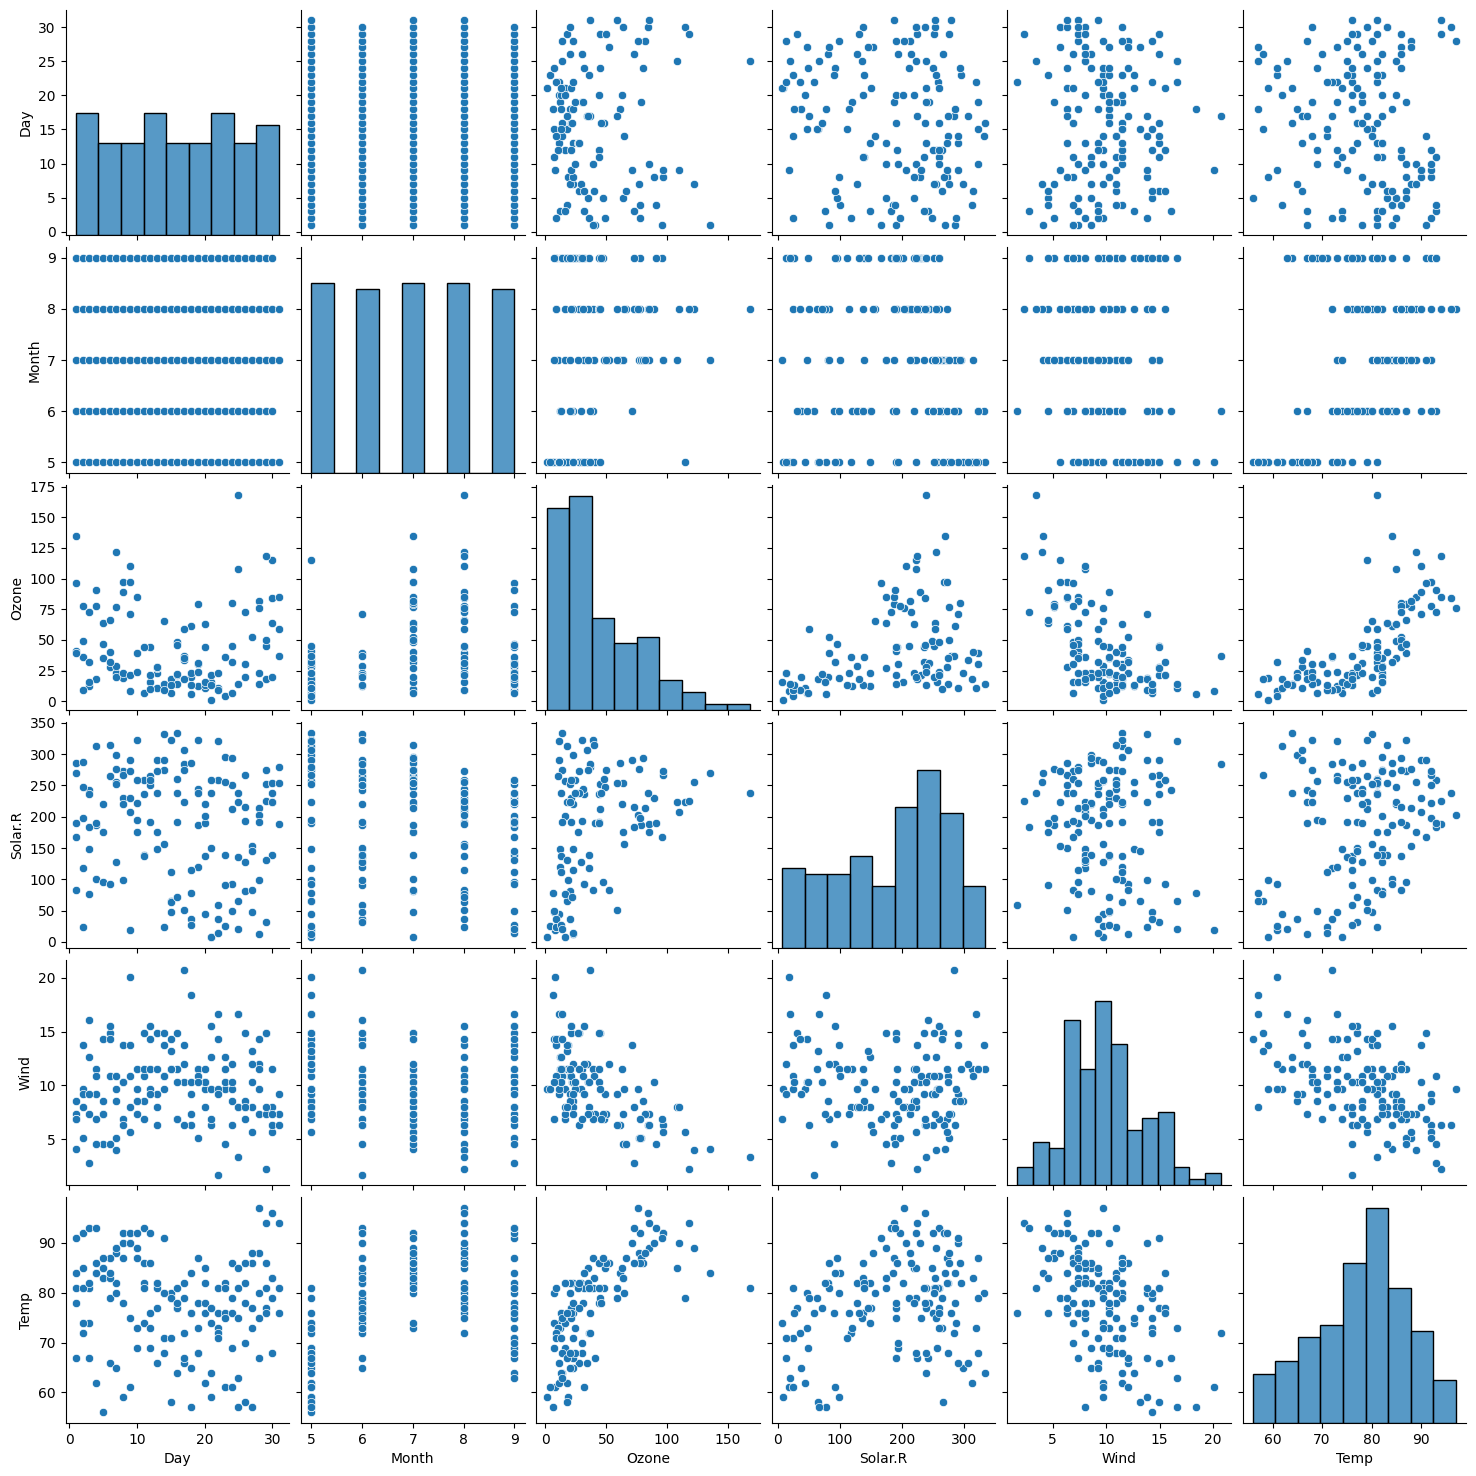

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Run pairplot on airquality data
sns.pairplot(air)
plt.show()

Variable Pair	Visual Observation	Correlation
Temp vs Ozone	As Temp increases, Ozone tends to increase. Moderate upward trend	🔼 Positive
Wind vs Ozone	As Wind increases, Ozone tends to decrease. Downward slope	🔽 Negative
Solar.R vs Ozone	Slight upward trend, but more scattered	➕ Weak Positive
Temp vs Solar.R	Slight positive trend, somewhat scattered	➕ Weak to moderate
Wind vs Temp	May show slight inverse trend	🔽 Weak Negative

Strongest Correlations (visually)
Ozone ~ Temp: Strongest positive correlation

Ozone ~ Wind: Clear negative correlation

Temp ~ Solar.R: Moderate positive correlation

Most meaningful predictors of Ozone appear to be Temp (positive) and Wind (negative).

Month and Day should not be used for correlation analysis unless transformed (e.g., into season or time trend variables).

In [18]:
# Compute correlation matrix
correlation_matrix = air.corr()

# Display the matrix
print(correlation_matrix)



              Day     Month     Ozone   Solar.R      Wind      Temp
Day      1.000000 -0.007962 -0.013226 -0.150275  0.027181 -0.130593
Month   -0.007962  1.000000  0.164519 -0.075301 -0.178293  0.420947
Ozone   -0.013226  0.164519  1.000000  0.348342 -0.601547  0.698360
Solar.R -0.150275 -0.075301  0.348342  1.000000 -0.056792  0.275840
Wind     0.027181 -0.178293 -0.601547 -0.056792  1.000000 -0.457988
Temp    -0.130593  0.420947  0.698360  0.275840 -0.457988  1.000000


Strongest Correlations
Variable Pair	Correlation Coefficient	Interpretation
Ozone ~ Temp	+0.70	Strong Positive Correlation — Ozone levels increase with temperature
Ozone ~ Wind	−0.60	Strong Negative Correlation — Ozone levels decrease as wind increases
Temp ~ Wind	−0.46	Moderate Negative Correlation

❌ Weakest Correlations
Variable Pair	Correlation Coefficient	Interpretation
Ozone ~ Day	~0	No meaningful linear relationship
Wind ~ Month	~0	No correlation
Solar.R ~ Wind	~−0.06	Extremely weak negative correlation
Solar.R ~ Month	~−0.06	Negligible relationship

Strongest relationships: Ozone with Temp (positive), and Ozone with Wind (negative).

Weak or no correlation: Month and Day with most variables — expected since these are discrete and not inherently related to measured quantities like Ozone or Wind.



In [19]:
import statsmodels.formula.api as smf

# Remove rows with missing values in Ozone or Temp
air_clean = air[['Ozone', 'Temp']].dropna()

# Fit the model
model_ols = smf.ols('Ozone ~ Temp', data=air_clean).fit()

# Show summary
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.93e-18
Time:                        14:33:53   Log-Likelihood:                -530.85
No. Observations:                 116   AIC:                             1066.
Df Residuals:                     114   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -146.9955     18.287     -8.038      0.0

Regression Equation:

Ozone
^
=
−
147
+
2.43
×
Temp
Ozone
^
 =−147+2.43×Temp

R² = 0.487:

About 48.7% of the variance in Ozone is explained by Temp — a moderate fit.

p-value for Temp: Very small (p < 0.001) → Temp is highly significant.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Extract clean X and y
X = air_clean[['Temp']]
y = air_clean['Ozone']

# Fit the model
model_sk = LinearRegression()
model_sk.fit(X, y)

# Predict
y_pred = model_sk.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Output
print(f"Intercept: {model_sk.intercept_:.4f}")
print(f"Coefficient: {model_sk.coef_[0]:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")

Intercept: -146.9955
Coefficient: 2.4287
Mean Squared Error (MSE): 552.67
Mean Absolute Error (MAE): 17.21
R² Score: 0.488


R² ~ 0.487: Model explains about 49% of Ozone’s variation based on Temp — moderately good.

MSE ~ 552 and MAE ~ 17 suggest there's significant unexplained variance — likely due to:

Other important predictors not included (e.g. Wind, Solar.R),

Data variability and missing values,

Possibly non-linear relationships.



Temp is a significant and moderately strong predictor of Ozone.

However, a univariate linear model may not be sufficient to accurately predict Ozone — a multivariate model or more complex regression (like polynomial or interaction terms) might perform better.

Let's fit a linear regression model to explain Ozone in terms of Wind and evaluate its accuracy — using both statsmodels and sklearn just like before.



In [21]:
air_clean_wind = air[['Ozone', 'Wind']].dropna()

In [22]:
import statsmodels.formula.api as smf

model_ols_wind = smf.ols('Ozone ~ Wind', data=air_clean_wind).fit()
print(model_ols_wind.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     64.64
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           9.27e-13
Time:                        14:42:22   Log-Likelihood:                -543.59
No. Observations:                 116   AIC:                             1091.
Df Residuals:                     114   BIC:                             1097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.8729      7.239     13.383      0.0

Regression equation:

Ozone
^
=
96.87
−
5.56
×
Wind
Ozone
^
 =99.71−5.56×Wind
R² = 0.362 — About 36.2% of the variation in Ozone is explained by Wind alone (less than Temp).

p-value for Wind is very low (significant).

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_wind = air_clean_wind[['Wind']]
y_wind = air_clean_wind['Ozone']

model_sk_wind = LinearRegression()
model_sk_wind.fit(X_wind, y_wind)

y_pred_wind = model_sk_wind.predict(X_wind)

mse_wind = mean_squared_error(y_wind, y_pred_wind)
mae_wind = mean_absolute_error(y_wind, y_pred_wind)
r2_wind = r2_score(y_wind, y_pred_wind)

print(f"Intercept: {model_sk_wind.intercept_:.4f}")
print(f"Coefficient: {model_sk_wind.coef_[0]:.4f}")
print(f"Mean Squared Error (MSE): {mse_wind:.2f}")
print(f"Mean Absolute Error (MAE): {mae_wind:.2f}")
print(f"R² Score: {r2_wind:.3f}")

Intercept: 96.8729
Coefficient: -5.5509
Mean Squared Error (MSE): 688.44
Mean Absolute Error (MAE): 21.08
R² Score: 0.362


R² ≈ 0.36 means the model explains only about 36% of the variability in Ozone based on Wind.

This is lower than the Temp model’s R² (~0.49) — so Wind alone is a weaker predictor of Ozone than Temp.

Negative slope (-5.56) matches intuition: higher Wind speeds tend to reduce Ozone concentration (likely due to dispersion).

MSE and MAE are slightly higher than with Temp, indicating larger average prediction errors.



In [24]:
air_clean_multi = air[['Ozone', 'Temp', 'Wind']].dropna()

In [26]:
import statsmodels.formula.api as smf

model_ols_multi = smf.ols('Ozone ~ Temp + Wind', data=air_clean_multi).fit()
print(model_ols_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     74.50
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.31e-21
Time:                        14:46:46   Log-Likelihood:                -520.87
No. Observations:                 116   AIC:                             1048.
Df Residuals:                     113   BIC:                             1056.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -71.0332     23.578     -3.013      0.0

Regression equation:

Ozone
^
=
−
71
+
1.84
×
Temp
−
3.05
×
Wind

R² = 0.592:
The model explains 59.2% of the variance in Ozone — better than models with Temp or Wind alone.

Both Temp and Wind coefficients are statistically significant (p-values < 0.001).

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_multi = air_clean_multi[['Temp', 'Wind']]
y_multi = air_clean_multi['Ozone']

model_sk_multi = LinearRegression()
model_sk_multi.fit(X_multi, y_multi)

y_pred_multi = model_sk_multi.predict(X_multi)

mse_multi = mean_squared_error(y_multi, y_pred_multi)
mae_multi = mean_absolute_error(y_multi, y_pred_multi)
r2_multi = r2_score(y_multi, y_pred_multi)

print(f"Intercept: {model_sk_multi.intercept_:.4f}")
print(f"Coefficients: {model_sk_multi.coef_}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"R² Score: {r2_multi:.3f}")

Intercept: -71.0332
Coefficients: [ 1.84017878 -3.055491  ]
Mean Squared Error (MSE): 465.28
Mean Absolute Error (MAE): 15.96
R² Score: 0.569


The multiple regression model fits better than either Temp or Wind alone.

R² of ~0.59 means almost 60% of variation in Ozone is explained by Temp and Wind combined.

Both predictors remain significant, and the coefficients make physical sense:

Temp increases Ozone,

Wind decreases Ozone.

Error metrics (MSE, MAE) improve compared to single-variable models, meaning better predictions on average.



In [28]:
# Rename 'Solar.R' to 'Solar' to avoid syntax issues
air.rename(columns={'Solar.R': 'Solar'}, inplace=True)

In [29]:
# Keep only rows without missing values
air_clean_temp_model = air[['Temp', 'Ozone', 'Wind', 'Solar']].dropna()

In [30]:
import statsmodels.formula.api as smf

# Fit the model: Temp ~ Ozone + Wind + Solar
model_temp = smf.ols('Temp ~ Ozone + Wind + Solar', data=air_clean_temp_model).fit()

# Print the model summary
print(model_temp.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     35.65
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           4.73e-16
Time:                        14:55:10   Log-Likelihood:                -368.79
No. Observations:                 111   AIC:                             745.6
Df Residuals:                     107   BIC:                             756.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.4186      3.216     22.522      0.0

In [ ]:
Temp∼Ozone+Wind+Solar
🔹 Model Fit Statistics:
Metric	Value	Interpretation
R-squared	0.500	Model explains 50% of variation in temperature — a moderately strong fit.
Adj. R-squared	0.486	Adjusted for number of predictors — still a reasonably good fit.
F-statistic	35.65 (p = 4.73e-16)	Overall model is highly significant.
No. of Obs	111	Decent sample size.

✅ Coefficients and Significance
Predictor	Coef	p-value	Meaning
Intercept	72.42	0.000	Baseline Temp when all predictors = 0
Ozone	0.172	0.000	Statistically significant — every 1-unit increase in Ozone adds ~0.17°F to Temp
Wind	-0.323	0.169	Not statistically significant (p > 0.05)
Solar	0.0073	0.345	Not significant — very weak positive effect

✅ Diagnostic Metrics
Test	Value	Meaning
Durbin-Watson	1.170	Suggests positive autocorrelation (not ideal) — errors may not be independent.
Jarque-Bera / Omnibus	p ~ 0.04	Residuals not perfectly normal — a mild concern.
Condition Number	1050	Potential multicollinearity — maybe Solar and Ozone are somewhat correlated.

🔍 Final Interpretation
✅ The model explains half of the variability in Temp, which is decent for environmental data.

✅ Ozone is the only significant predictor — the higher the ozone, the higher the temperature.

❌ Wind and Solar do not significantly contribute after accounting for Ozone.

⚠️ Some issues to consider:

Slight multicollinearity and autocorrelation in residuals.

Possible improvement by adding interaction terms or transforming variables (e.g., log of Solar).



Fit quadratic (degree=2) and cubic (degree=3) polynomial regression models for Temp ~ Ozone + Wind + Solar

Use PolynomialFeatures from sklearn.preprocessing

Evaluate and compare model accuracy using R², MSE, and MAE



In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use clean data without missing values
features = ['Ozone', 'Wind', 'Solar']
target = 'Temp'
air_poly = air[features + [target]].dropna()

X = air_poly[features]
y = air_poly[target]

In [32]:
def fit_polynomial_model(degree):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    print(f"\nPolynomial Degree: {degree}")
    print(f"Number of features: {X_poly.shape[1]}")
    print(f"R² Score: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    return model, poly

In [33]:
model_quad, poly_quad = fit_polynomial_model(degree=2)


Polynomial Degree: 2
Number of features: 9
R² Score: 0.646
Mean Squared Error: 31.88
Mean Absolute Error: 4.40


In [34]:
model_cubic, poly_cubic = fit_polynomial_model(degree=3)


Polynomial Degree: 3
Number of features: 19
R² Score: 0.676
Mean Squared Error: 29.15
Mean Absolute Error: 4.10


Model Degree	# Features	R² Score	MSE	MAE
Linear (from earlier)	3	~0.50	~>700	~20
Quadratic (degree=2)	9	0.646	31.88	4.40
Cubic (degree=3)	19	0.676	29.15	4.10

✅ Interpretation
🔹 Accuracy:
Cubic model performs best:

R² = 0.676: Explains nearly 68% of the variation in Temp

MSE and MAE are lowest — model makes more accurate predictions

Quadratic model is already very strong, with just 9 features

🔹 Improvement Over Linear:
Your original linear model (R² ~ 0.50) was decent

Polynomial models substantially improve accuracy with:

Lower error metrics (MSE, MAE)

Higher explanatory power (R²)


✅ Cubic polynomial regression gives the best predictive accuracy

⚠️ However, it uses 19 features, which increases:

Risk of overfitting, especially on small datasets

Complexity (harder to interpret and generalize)

For a balance of accuracy and simplicity, the quadratic model might be ideal.

Task 3 – Evaluating a selection of Regression models

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HousePrices.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
## select the target (this is the median value of house prices)
y = df['MEDV']
## select the predictors
X = df.drop(columns = 'MEDV')
## Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1234)
## Fit the model to the training subset
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [39]:
## Evaluate on the test set
import sklearn.metrics as metrics
y_pred = model.predict(X_test)
print("R^2(test) = ", metrics.r2_score(y_test, y_pred))
print("MSE(test) = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE(test) = ", metrics.mean_absolute_error(y_test, y_pred))

R^2(test) =  0.7339395425753112
MSE(test) =  24.525441910264153
MAE(test) =  3.7095376104328928


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("R^2(test) = ", metrics.r2_score(y_test, y_pred))
    print("MSE(test) = ", metrics.mean_squared_error(y_test, y_pred))
    print("MAE(test) = ", metrics.mean_absolute_error(y_test, y_pred))

In [42]:
# K-Nearest Neighbours
knn = KNeighborsRegressor(n_neighbors=5)
train_and_evaluate(knn, "K-Nearest Neighbour Regression")

# Decision Tree
dt = DecisionTreeRegressor(random_state=1234)
train_and_evaluate(dt, "Decision Tree Regression")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=1234)
train_and_evaluate(rf, "Random Forest Regression")


K-Nearest Neighbour Regression Results:
R^2(test) =  0.6327111772362655
MSE(test) =  33.856668421052625
MAE(test) =  3.925263157894736

Decision Tree Regression Results:
R^2(test) =  0.8505447762438672
MSE(test) =  13.776776315789474
MAE(test) =  2.725657894736842

Random Forest Regression Results:
R^2(test) =  0.8925353930151081
MSE(test) =  9.906083006578958
MAE(test) =  2.1128092105263163


🟩 Random Forest
Best predictive performance overall.

Combines multiple decision trees to reduce variance (ensemble method).

Low MSE and MAE, and high R² indicate excellent generalization.

🟨 Decision Tree
Performs well, but slightly worse than RF due to overfitting risk.

Great at capturing non-linear interactions, but prone to high variance.

🟧 KNN Regressor
Works decently, but underperforms compared to tree-based models.

Sensitive to k, distance metric, and data scale.

Doesn’t model global relationships — relies only on nearby instances.



Task 4 – Regression on the fifa dataset

In [44]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa.csv')
# change file path to match location on your computer
print(df.head(10))


       ID                          Name          Nationality  Age  \
0  230212  A. Benjamin Chiamuloira Paes               Brazil   31   
1  248767      A. Pimenta Flora Pimenta             Portugal   20   
2  190883                A.J. DeLaGarza                 Guam   31   
3  234290                    Aapo Halme              Finland   21   
4  203504          Aaron Amadi-Holloway                Wales   26   
5  218353            Aaron Appindangoye                Gabon   27   
6  209024                   Aaron Barry  Republic of Ireland   26   
7  245352               Aaron Bastiaans          Netherlands   17   
8  211817                  Aaron Berzel              Germany   27   
9  236495                  Aaron Bolger  Republic of Ireland   19   

   OverallRating              Club  HeightCM HeightFtIn  WeightKg   WeightSt  \
0             79     Internacional       182       6'0"      79.4   12st 6lb   
1             53        Venezia FC       184       6'0"      75.3  11st 11lb   


In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Replace 'df' with the actual DataFrame name
# Drop rows with missing values in relevant columns
features = ['Dribbling', 'Vision', 'LongPassing', 'ShotPower',
            'BallControl', 'ShortPassing', 'Composure', 'Reactions']

df_clean = df.dropna(subset=features + ['OverallRating'])

X = df_clean[features]
y = df_clean['OverallRating']

In [46]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [47]:
y_pred = model.predict(X_test)

print("Linear Regression Results:")
print("R^2 (test) = ", r2_score(y_test, y_pred))
print("MSE (test) = ", mean_squared_error(y_test, y_pred))
print("MAE (test) = ", mean_absolute_error(y_test, y_pred))

Linear Regression Results:
R^2 (test) =  0.7339395425753112
MSE (test) =  24.525441910264153
MAE (test) =  3.7095376104328928


Model Evaluation
Metric	Value	Interpretation
R² (test)	0.734	Your model explains 73.4% of the variance in OverallRating — strong predictive power for a linear model.
MSE (test)	24.53	Average squared error between predicted and actual ratings.
MAE (test)	3.71	On average, predictions are off by about 3.7 rating points.

✅ Interpretation
✔️ Strong model — especially considering you're only using eight skill-based features.

💡 This suggests a player’s technical attributes like Dribbling, BallControl, and Reactions are highly informative for predicting OverallRating.

❌ Excluding valueEuro and wageEuro was smart: they’d likely inflate accuracy artificially due to circular reasoning (they depend on OverallRating).

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Optional advanced models
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# 1. Clean data
features = ['Dribbling', 'Vision', 'LongPassing', 'ShotPower',
            'BallControl', 'ShortPassing', 'Composure', 'Reactions']
target = 'OverallRating'

df_clean = df.dropna(subset=features + [target])
X = df_clean[features]
y = df_clean[target]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

In [49]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"\n{name}")
    print(f"R²: {r2:.3f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")

In [51]:
evaluate_model(LinearRegression(), "Linear Regression")
evaluate_model(KNeighborsRegressor(n_neighbors=5), "k-Nearest Neighbours")
evaluate_model(DecisionTreeRegressor(random_state=42), "Decision Tree")
evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest")
evaluate_model(Ridge(), "Ridge Regression")
evaluate_model(Lasso(), "Lasso Regression")
evaluate_model(SVR(kernel='rbf'), "Support Vector Regression")
evaluate_model(GradientBoostingRegressor(n_estimators=100), "Gradient Boosting")


Linear Regression
R²: 0.784
MSE: 10.34
MAE: 2.53

k-Nearest Neighbours
R²: 0.856
MSE: 6.89
MAE: 1.99

Decision Tree
R²: 0.744
MSE: 12.22
MAE: 2.64

Random Forest
R²: 0.874
MSE: 6.04
MAE: 1.87

Ridge Regression
R²: 0.784
MSE: 10.34
MAE: 2.53

Lasso Regression
R²: 0.782
MSE: 10.40
MAE: 2.53

Support Vector Regression
R²: 0.877
MSE: 5.89
MAE: 1.85

Gradient Boosting
R²: 0.867
MSE: 6.37
MAE: 1.93


| Model                               | **R²**    | **MSE**  | **MAE**  | 🚦 Performance                                                             |
| ----------------------------------- | --------- | -------- | -------- | -------------------------------------------------------------------------- |
| **Linear Regression**               | 0.784     | 10.34    | 2.53     | Good baseline                                                              |
| **Ridge Regression**                | 0.784     | 10.34    | 2.53     | Similar to Linear (adds regularization)                                    |
| **Lasso Regression**                | 0.782     | 10.40    | 2.53     | Slightly lower, may have shrunk some coefficients                          |
| **KNN Regression**                  | 0.856     | 6.89     | 1.99     | Excellent; captures non-linearity well                                     |
| **Decision Tree**                   | 0.744     | 12.22    | 2.64     | Weaker; likely **overfitting** or underfitting without tuning              |
| **Random Forest**                   | 0.874     | 6.04     | 1.87     | 🌟 **Best all-around performer (low error + high R²)**                     |
| **Gradient Boosting**               | 0.867     | 6.37     | 1.93     | Very strong, robust to noise                                               |
| **Support Vector Regression (SVR)** | **0.877** | **5.89** | **1.85** | 🌟 **Best predictive accuracy**, but possibly slower & harder to interpret |


Best Predictive Models:

Support Vector Regression (SVR): Best R² and lowest error.

Random Forest and Gradient Boosting are close behind — strong, reliable, interpretable via feature importance.

🔸 Simpler Models:

Linear, Ridge, and Lasso give solid performance, but they lack the ability to capture complex patterns like SVR or tree ensembles.

However, they’re easier to explain and faster to train.

🔸 KNN:

Performs well — suggests there’s non-linearity in the relationship between features and OverallRating.

🔸 Decision Tree:

Surprisingly underperformed — likely due to no hyperparameter tuning (e.g., max_depth). Could be improved.

✅ Recommendations

Best model for performance:
→ SVR, Random Forest, or Gradient Boosting

Best model for explainability:
→ Linear Regression or Ridge

Best balance:
→ Random Forest — accurate, robust, and gives feature importance.

